In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate, LeaveOneOut, KFold, train_test_split

import logging
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')


import mlflow
mlflow.set_tracking_uri("http://192.168.1.154:5001/")
mlflow.set_experiment("/archimedes-ml")
# enable autologging
mlflow.sklearn.autolog()

2022/09/17 21:36:28 INFO mlflow.tracking.fluent: Experiment with name '/archimedes-ml' does not exist. Creating a new experiment.


In [9]:
score = 'accuracy'

#this data has been previously processed by airflow
features = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_radius__20220912.csv") #TODO automate
features = features.set_index(features.columns[0])
labels = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data_augmentation_radius__20220912_labels.csv") #TODO automate
labels = labels.set_index(labels.columns[0])
print("Loaded data from CSV")
features.head(10)

Loaded data from CSV


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
C01_1,0.000000,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,...,20.696314,20.918954,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842
C01_1,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,...,20.918954,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459
C01_1,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,...,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607
C01_1,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,...,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279
C01_1,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,...,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084
C01_1,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,19.691173,...,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084,43.617909
C01_1,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,19.691173,15.053034,...,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084,43.617909,47.070318
C01_1,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,19.691173,15.053034,15.215300,...,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084,43.617909,47.070318,46.400274
C01_1,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,19.691173,15.053034,15.215300,17.816949,...,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084,43.617909,47.070318,46.400274,47.112586


In [10]:
features.index.unique()

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011_1', 'T011_2',
       'T012_1', 'T012_2', 'T013', 'T014', 'T015', 'T018', 'T021', 'T023_1',
       'T023_2', 'T025', 'T026', 'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object', name='Unnamed: 0')

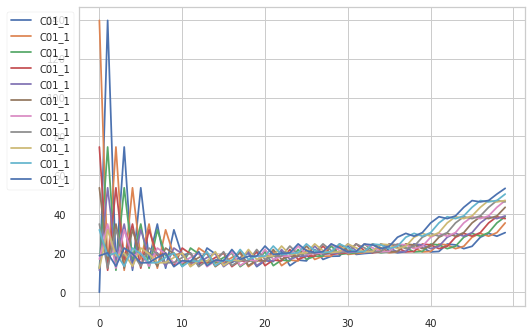

In [11]:
from matplotlib import pyplot as plt

ax=features.loc['C01_1'][0:11].T.plot()
ax.legend(bbox_to_anchor=(0, 1))

In [12]:
features.loc['C01_1'].shape

(4047, 50)

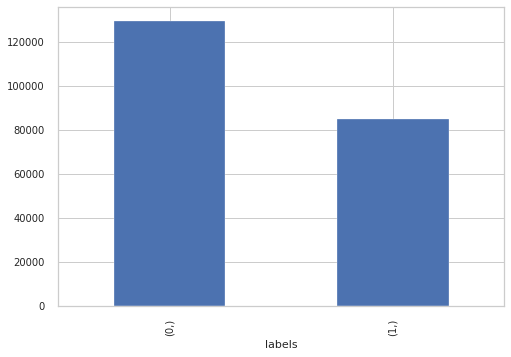

In [13]:
_=labels.value_counts().plot.bar()

In [14]:
labels.count()

labels    214491
dtype: int64

In [15]:
le = LabelEncoder().fit(labels.values.ravel())
logging.info("Classes {}".format(le.classes_))
y = LabelEncoder().fit_transform(labels.values.ravel())
y.shape

(214491,)

In [16]:
X=features.values
X.shape

(214491, 50)

In [17]:
features

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
C01_1,0.000000,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,...,20.696314,20.918954,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842
C01_1,139.620900,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,...,20.918954,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459
C01_1,12.303175,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,...,24.735220,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607
C01_1,74.603526,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,...,24.312920,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279
C01_1,11.278530,53.647830,16.991655,35.022860,12.339670,32.053996,18.735860,20.204644,13.337827,22.690049,...,22.370285,23.583166,28.246445,30.232018,28.765377,30.611842,35.592459,38.775607,37.805279,39.197084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T029,1918.424942,1933.500827,1936.777660,1953.754735,1954.257221,1969.061414,1973.506716,1978.426459,1989.901875,1986.199120,...,2060.789771,2069.220336,2060.810351,2098.546844,2064.621201,2110.436571,2080.912561,2100.225198,2113.985257,2061.646224
T029,1933.500827,1936.777660,1953.754735,1954.257221,1969.061414,1973.506716,1978.426459,1989.901875,1986.199120,1999.607398,...,2069.220336,2060.810351,2098.546844,2064.621201,2110.436571,2080.912561,2100.225198,2113.985257,2061.646224,2167.126687
T029,1936.777660,1953.754735,1954.257221,1969.061414,1973.506716,1978.426459,1989.901875,1986.199120,1999.607398,1993.758362,...,2060.810351,2098.546844,2064.621201,2110.436571,2080.912561,2100.225198,2113.985257,2061.646224,2167.126687,2000.823064


In [18]:
model_switcher = {
    'lda': LDA(),
    'random_forest': RandomForestClassifier(n_estimators=30),
    'knn': KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean'),
    'svm': SVC(kernel='rbf', gamma=0.2, C=10**3)
}

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=38)
#model = model_switcher['knn']
for key in model_switcher: 
    model = model_switcher[key]
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print("{} test accuracy: {}".format(key, result*100.0))

2022/09/17 21:38:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '21e301bf1dbb46b3b81d23b437459488', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/17 21:38:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."
2022/09/17 21:38:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '68a1d8e89d4f47209b921e923c10b7af', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


lda test accuracy: 60.469321729793876


2022/09/17 21:39:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '47915d443e5f4581b310a2619505f756', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


random_forest test accuracy: 91.33407739146405


2022/09/17 22:04:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a4c8597e0b4c4763ba1667603d981cfe', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


knn test accuracy: 90.63616970176454
svm test accuracy: 60.70384131783055


In [ ]:
predictions = pd.DataFrame(model_switcher['random_forest'].predict(features), columns=['prediction'])
predictions['suj'] = features.index
predictions.sample(3)

In [ ]:
predictions.groupby('suj').prediction.apply(list)